<ipython-input-1-32aec6e12a17>:8: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 63 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Timestamp                                                                                                                                                                   18126 non-null  object 
 1   1. What is your biggest reason for learning to code?                                                                                                                        17991 non-null  object 
 2   2. What methods have you used to learn about coding? Please select all that apply.

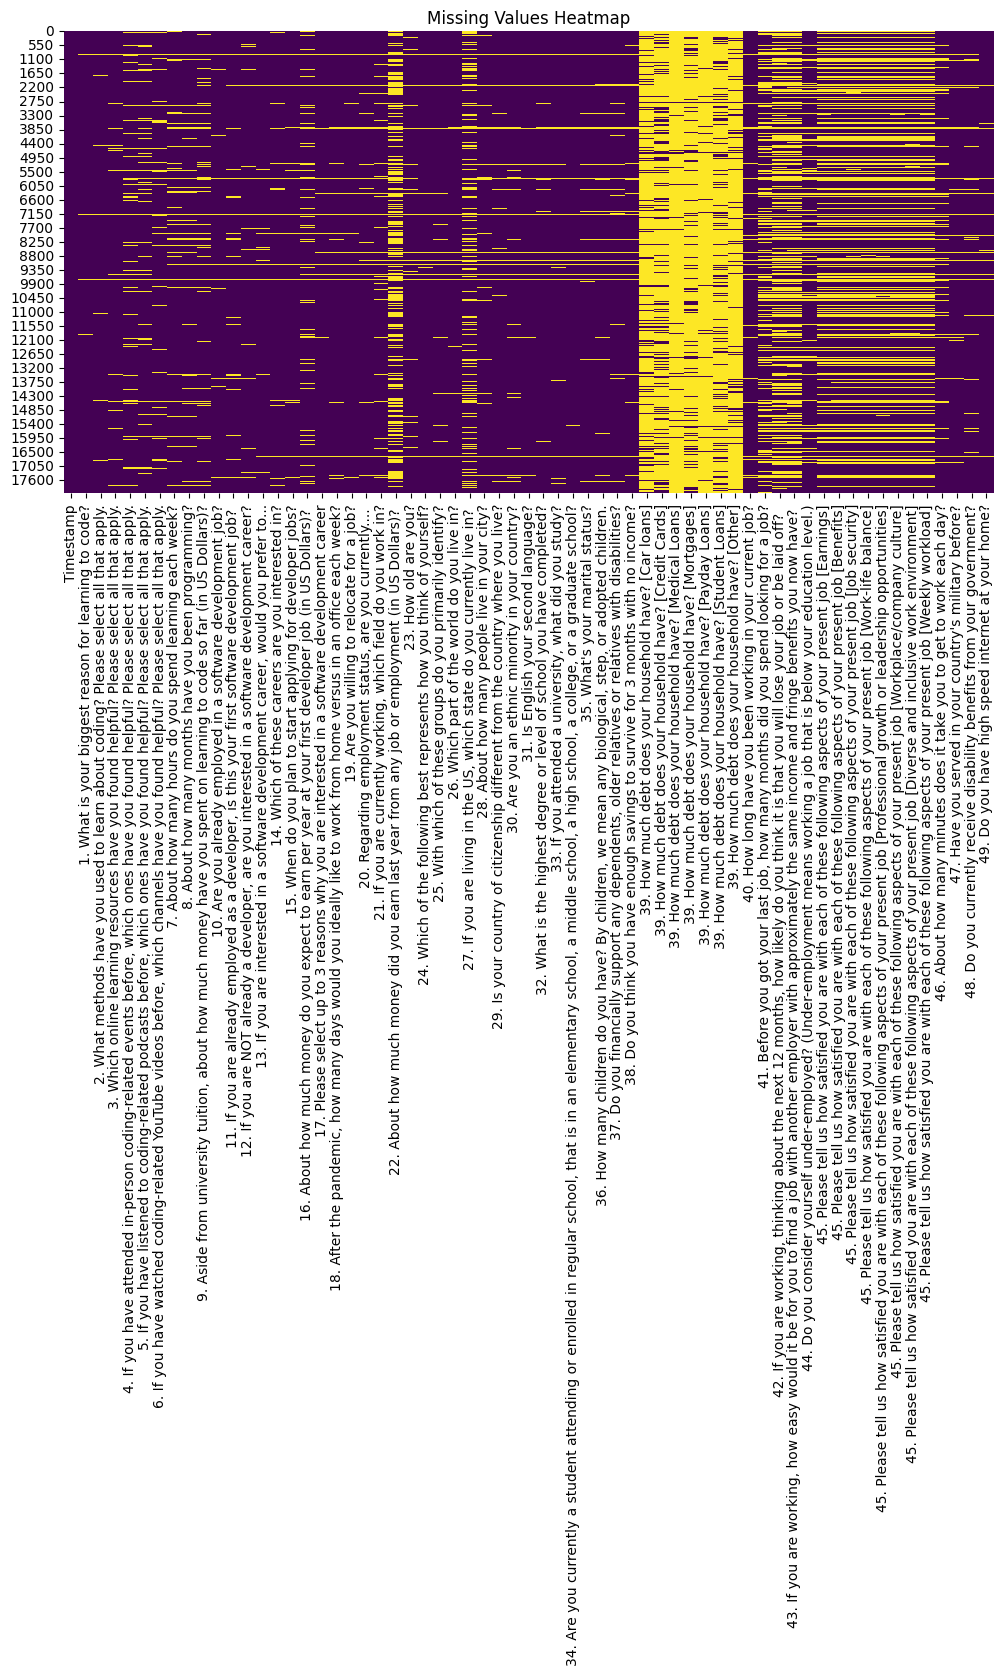

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '2021 New Coder Survey.csv'
df = pd.read_csv(file_path)


df.head()
df.info()

df.describe(include='all')


missing_values = df.isnull().sum()
missing_values[missing_values > 0]


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
# Display all column names
print("Available columns:")
for col in df.columns:
    print(f"  - {col}")
# Display the first few rows
print("\nFirst few rows:")
print(df.head())

Available columns:
  - Timestamp
  - 1. What is your biggest reason for learning to code?
  - 2. What methods have you used to learn about coding? Please select all that apply.
  - 3. Which online learning resources have you found helpful? Please select all that apply.
  - 4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.
  - 5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.
  - 6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.
  - 7. About how many hours do you spend learning each week?
  - 8. About how many months have you been programming?
  - 9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?
  - 10. Are you already employed in a software development job?
  - 11. If you are already employed 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


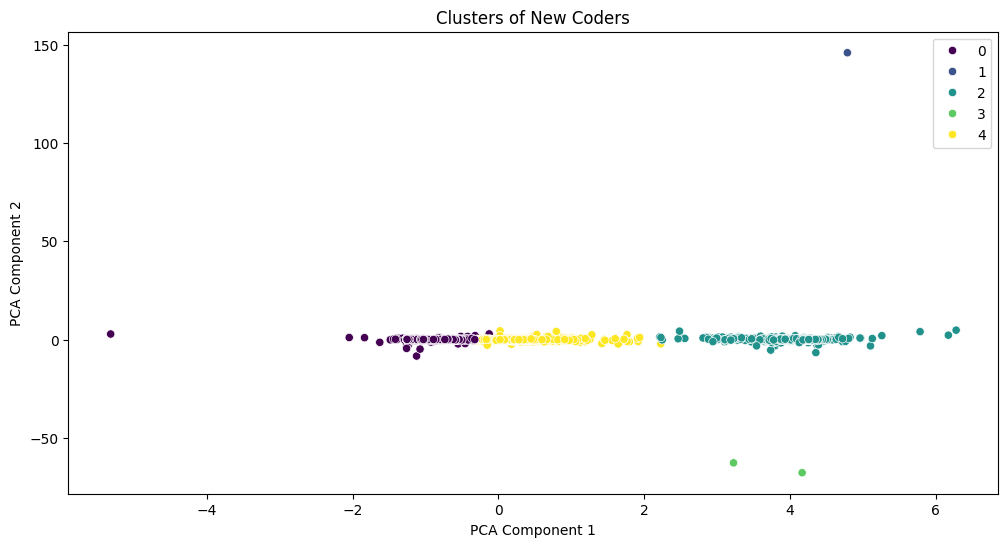

         7. About how many hours do you spend learning each week?  \
Cluster                                                             
0                                                11.475228          
1                                                10.000000          
2                                                11.741710          
3                                                22.750000          
4                                                14.741910          

         8. About how many months have you been programming?_0.0  \
Cluster                                                            
0                                                 0.000000         
1                                                 0.000000         
2                                                 0.205041         
3                                                 0.000000         
4                                                 0.000000         

         8. About how many months have 

In [ ]:

required_columns = ['7. About how many hours do you spend learning each week?',
                    '8. About how many months have you been programming?',
                    '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?']


missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")


df_clustering = df[required_columns].dropna()
df_clustering = pd.get_dummies(df_clustering)


scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_clustering_scaled)


kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_components)

df_clustering['Cluster'] = clusters


plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of New Coders')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


cluster_analysis = df_clustering.groupby('Cluster').mean()
print(cluster_analysis)


In [ ]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 63 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Timestamp                                                                                                                                                                   18126 non-null  object 
 1   1. What is your biggest reason for learning to code?                                                                                                                        17991 non-null  object 
 2   2. What methods have you used to learn about coding? Please select all that apply.

In [ ]:
print(df_classification.columns)


Index(['Timestamp', '1. What is your biggest reason for learning to code?',
       '2. What methods have you used to learn about coding? Please select all that apply.',
       '3. Which online learning resources have you found helpful? Please select all that apply.',
       '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
       '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
       '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
       '7. About how many hours do you spend learning each week?',
       '8. About how many months have you been programming?',
       '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
       '10. Are you already employed in a software development job

Available columns:
  - Timestamp
  - 1. What is your biggest reason for learning to code?
  - 2. What methods have you used to learn about coding? Please select all that apply.
  - 3. Which online learning resources have you found helpful? Please select all that apply.
  - 4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.
  - 5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.
  - 6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.
  - 7. About how many hours do you spend learning each week?
  - 8. About how many months have you been programming?
  - 9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?
  - 10. Are you already employed in a software development job?
  - 11. If you are already employed 

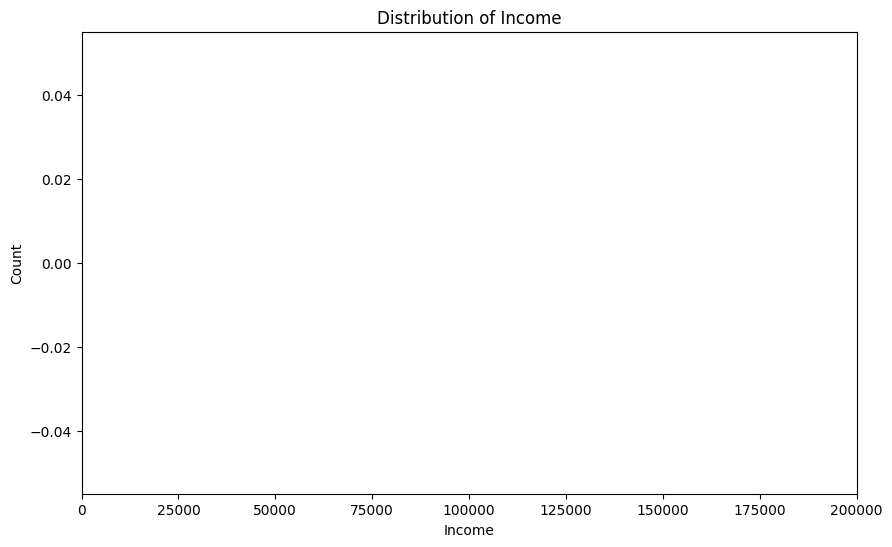


Age Summary:
count    17103.000000
mean        27.107420
std         10.145221
min          6.000000
25%         20.000000
50%         25.000000
75%         32.000000
max        120.000000
Name: Age, dtype: float64


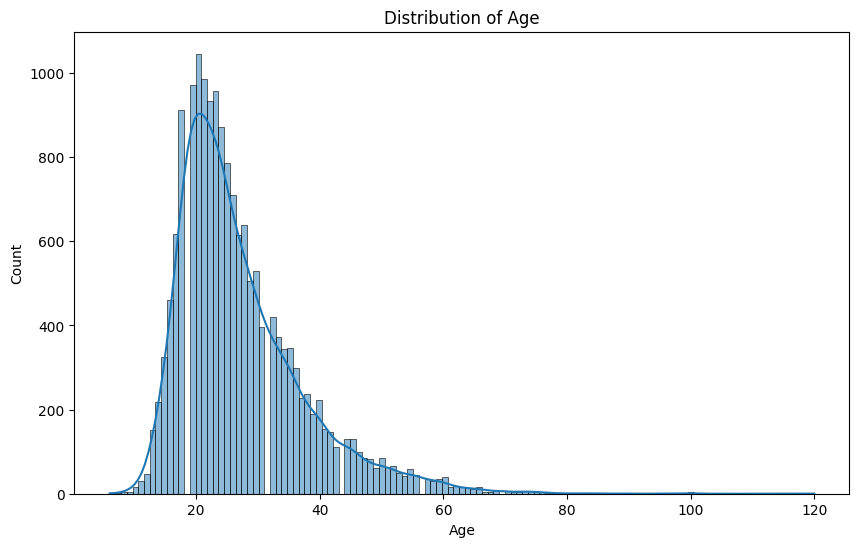


Learning Hours per Week Summary:
count    16603.000000
mean        12.654852
std         13.583577
min          0.000000
25%          4.000000
50%          8.000000
75%         19.000000
max        150.000000
Name: LearningHours, dtype: float64


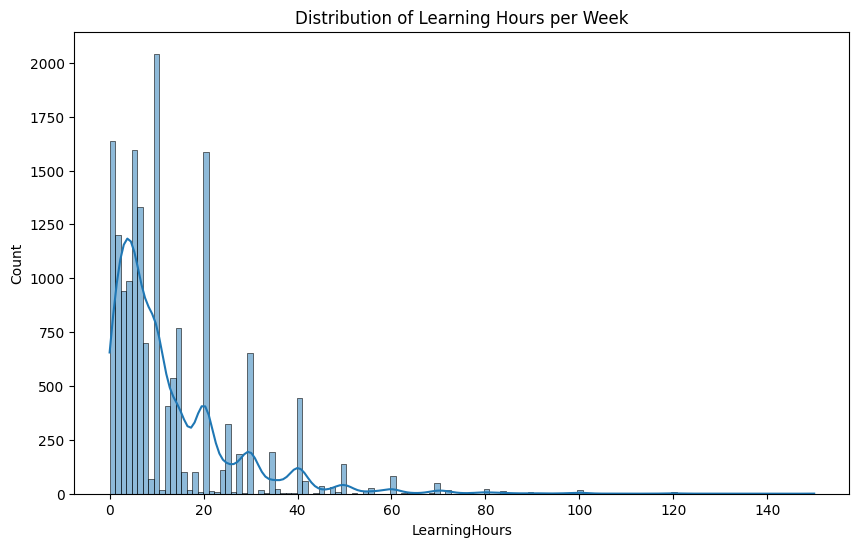

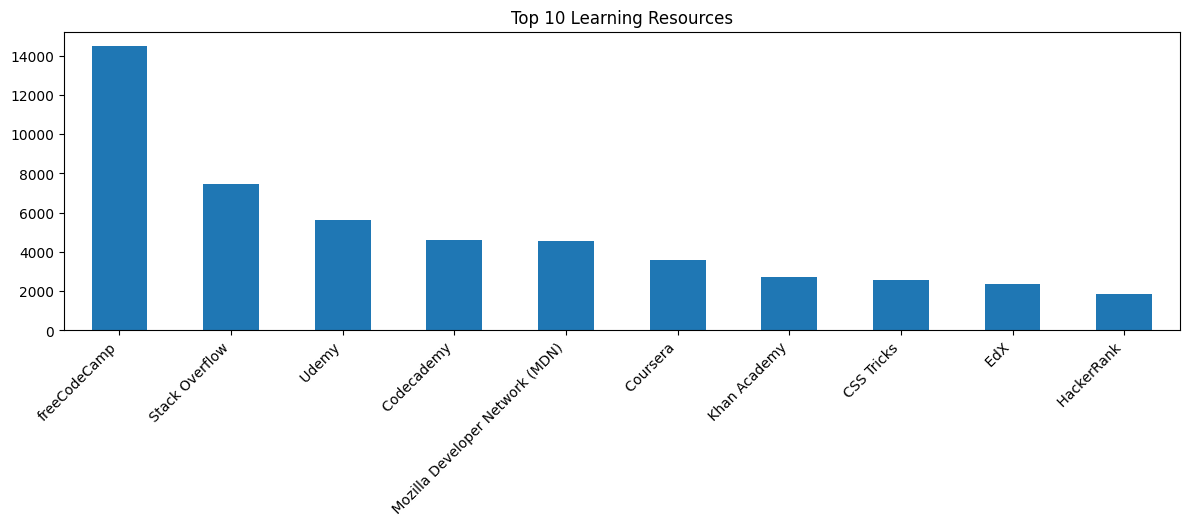

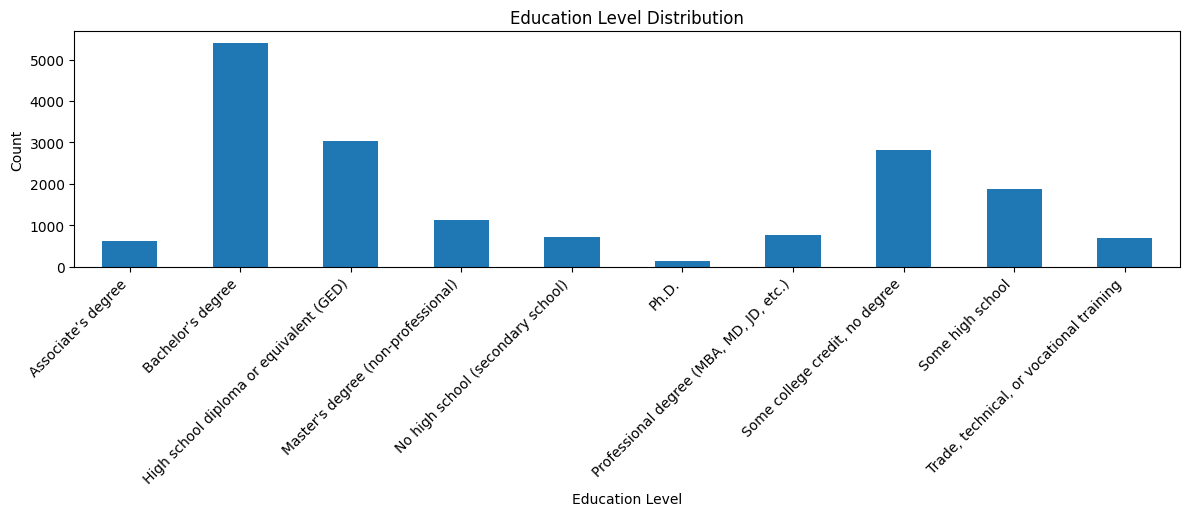

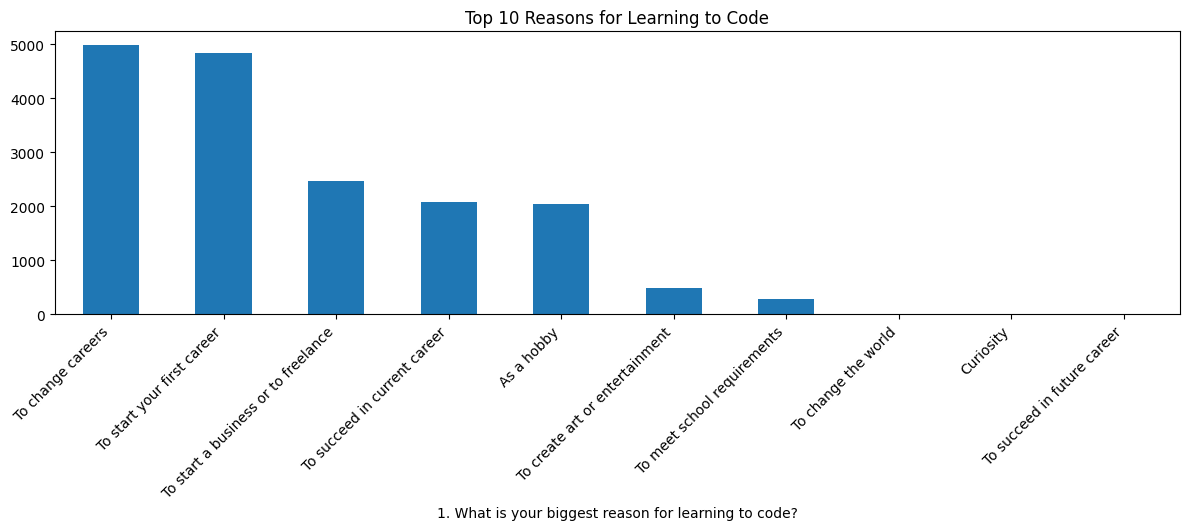

In [ ]:

print("Available columns:")
for col in df.columns:
    print(f"  - {col}")


income_col = [col for col in df.columns if 'earn' in col.lower() and 'last year' in col.lower()]
age_col = [col for col in df.columns if 'old' in col.lower() or 'age' in col.lower()]
learning_hours_col = [col for col in df.columns if 'hours' in col.lower() and 'learn' in col.lower()]
education_col = [col for col in df.columns if 'degree' in col.lower() or 'education' in col.lower() or 'school' in col.lower()]
reason_col = [col for col in df.columns if 'reason' in col.lower() and 'learn' in col.lower()]
resources_col = [col for col in df.columns if 'resources' in col.lower() and 'learn' in col.lower()]

print("\nFound columns:")
print(f"  - Income: {income_col}")
print(f"  - Age: {age_col}")
print(f"  - Learning Hours: {learning_hours_col}")
print(f"  - Education: {education_col}")
print(f"  - Reason for Learning: {reason_col}")
print(f"  - Learning Resources: {resources_col}")


def find_column(columns, keywords):
    for kw in keywords:
        found = [col for col in columns if kw in col.lower()]
        if found:
            return found[0]
    return None

income_col = find_column(df.columns, ['earn last year', 'income', 'salary', 'make last year'])
age_col = find_column(df.columns, ['how old', 'age'])
learning_hours_col = find_column(df.columns, ['hours', 'spend learning'])
education_col = find_column(df.columns, ['degree', 'education', 'school'])
reason_col = find_column(df.columns, ['reason', 'why', 'learn to code'])
resources_col = find_column(df.columns, ['resources', 'found helpful', 'learning'])

print("\nSelected columns:")
print(f"  - Income: {income_col}")
print(f"  - Age: {age_col}")
print(f"  - Learning Hours: {learning_hours_col}")
print(f"  - Education: {education_col}")
print(f"  - Reason for Learning: {reason_col}")
print(f"  - Learning Resources: {resources_col}")


if income_col:
    df['Income'] = pd.to_numeric(df[income_col], errors='coerce')
    df['HighIncome'] = (df['Income'] > 30000).astype(int)

    print("\nIncome Summary:")
    print(df['Income'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Income', kde=True)
    plt.title('Distribution of Income')
    plt.xlim(0, 200000)
    plt.show()

if age_col:
    df['Age'] = pd.to_numeric(df[age_col], errors='coerce')

    print("\nAge Summary:")
    print(df['Age'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', kde=True)
    plt.title('Distribution of Age')
    plt.show()

if learning_hours_col:
    df['LearningHours'] = pd.to_numeric(df[learning_hours_col], errors='coerce')

    print("\nLearning Hours per Week Summary:")
    print(df['LearningHours'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='LearningHours', kde=True)
    plt.title('Distribution of Learning Hours per Week')
    plt.show()

if resources_col:
    top_resources = df[resources_col].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    top_resources.plot(kind='bar')
    plt.title('Top 10 Learning Resources')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

if education_col:
    plt.figure(figsize=(12, 6))
    df[education_col].value_counts().sort_index().plot(kind='bar')
    plt.title('Education Level Distribution')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

if reason_col:
    plt.figure(figsize=(12, 6))
    df[reason_col].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Reasons for Learning to Code')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [ ]:

unique_classes = np.unique(y_train)
if len(unique_classes) < 2:
    print("Error: The target variable needs to have more than one class.")
    print("Unique classes found:", unique_classes)


Error: The target variable needs to have more than one class.
Unique classes found: [0]


In [ ]:
from imblearn.over_sampling import RandomOverSampler


unique_classes = np.unique(y_train)
if len(unique_classes) == 1:
    print("Error: The target variable has only one class.")
    print("Unique class found:", unique_classes)
else:

    oversampler = RandomOverSampler(random_state=42)
    X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)



Error: The target variable has only one class.
Unique class found: [0]


In [ ]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_test:", np.unique(y_test))


Unique classes in y_train: [0]
Unique classes in y_test: [0]


<ipython-input-1-2f02f6ad38f3>:15: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2021 New Coder Survey.csv')


Index(['Timestamp', '1. What is your biggest reason for learning to code?',
       '2. What methods have you used to learn about coding? Please select all that apply.',
       '3. Which online learning resources have you found helpful? Please select all that apply.',
       '4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.',
       '5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.',
       '6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.',
       '7. About how many hours do you spend learning each week?',
       '8. About how many months have you been programming?',
       '9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?',
       '10. Are you already employed in a software development job

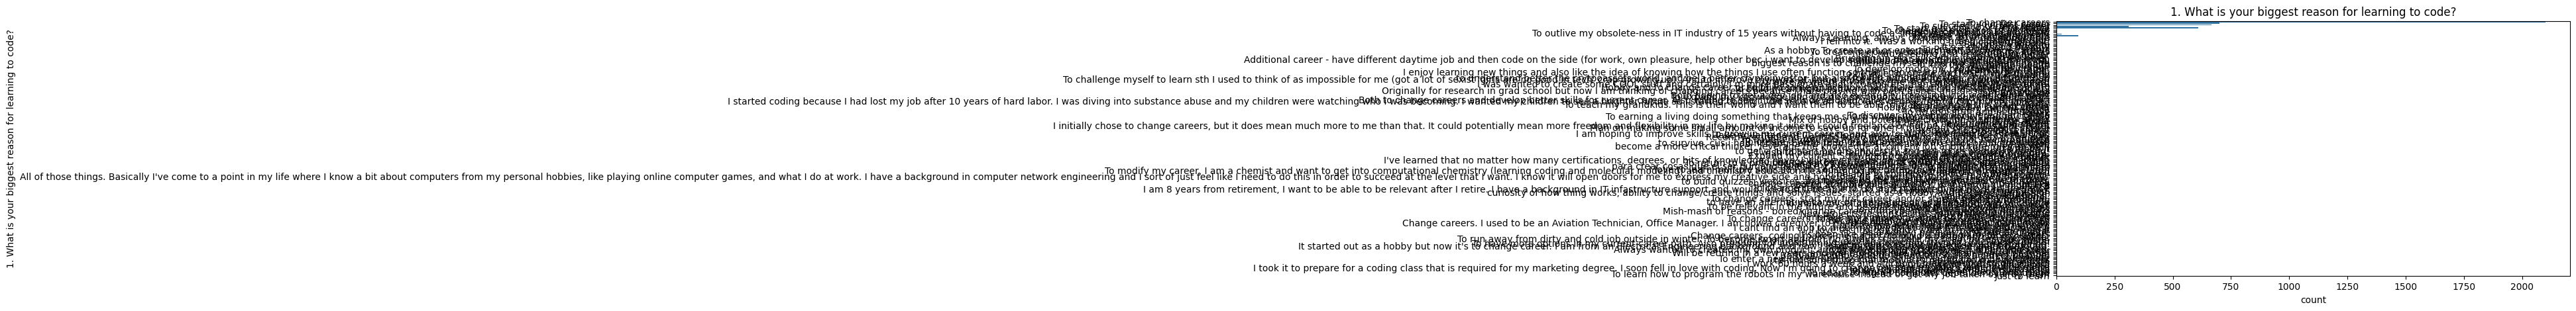

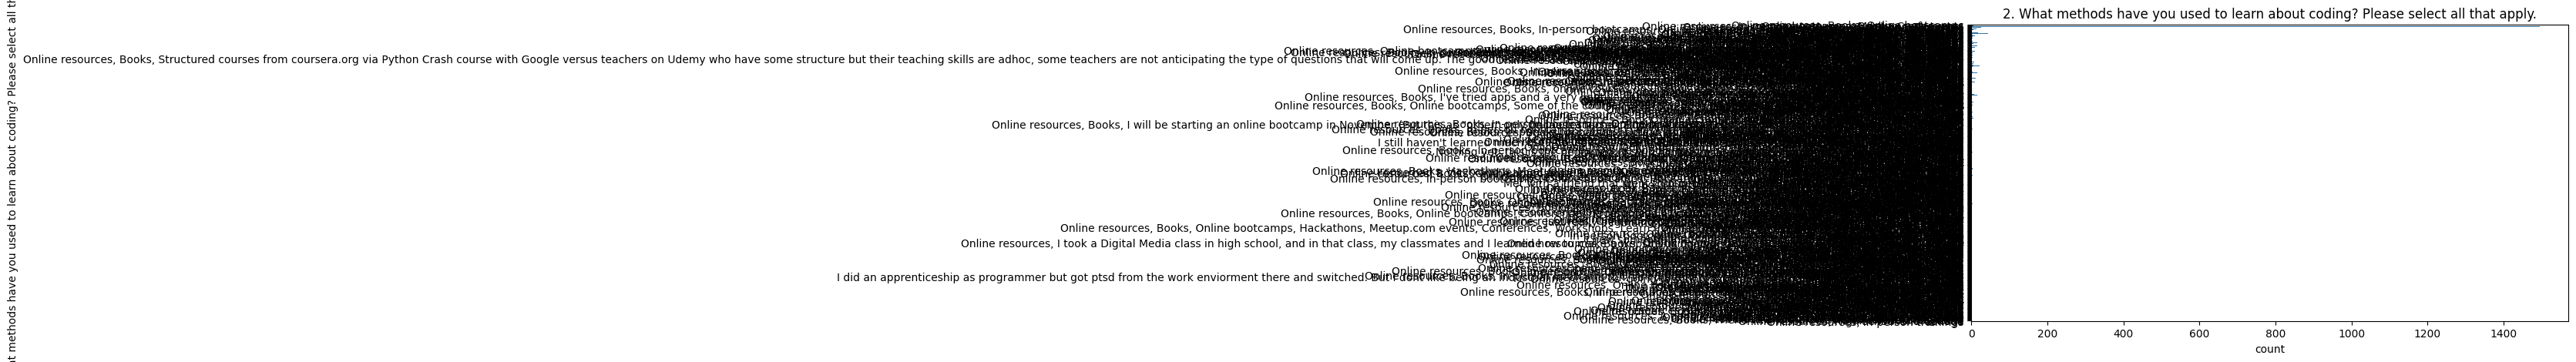

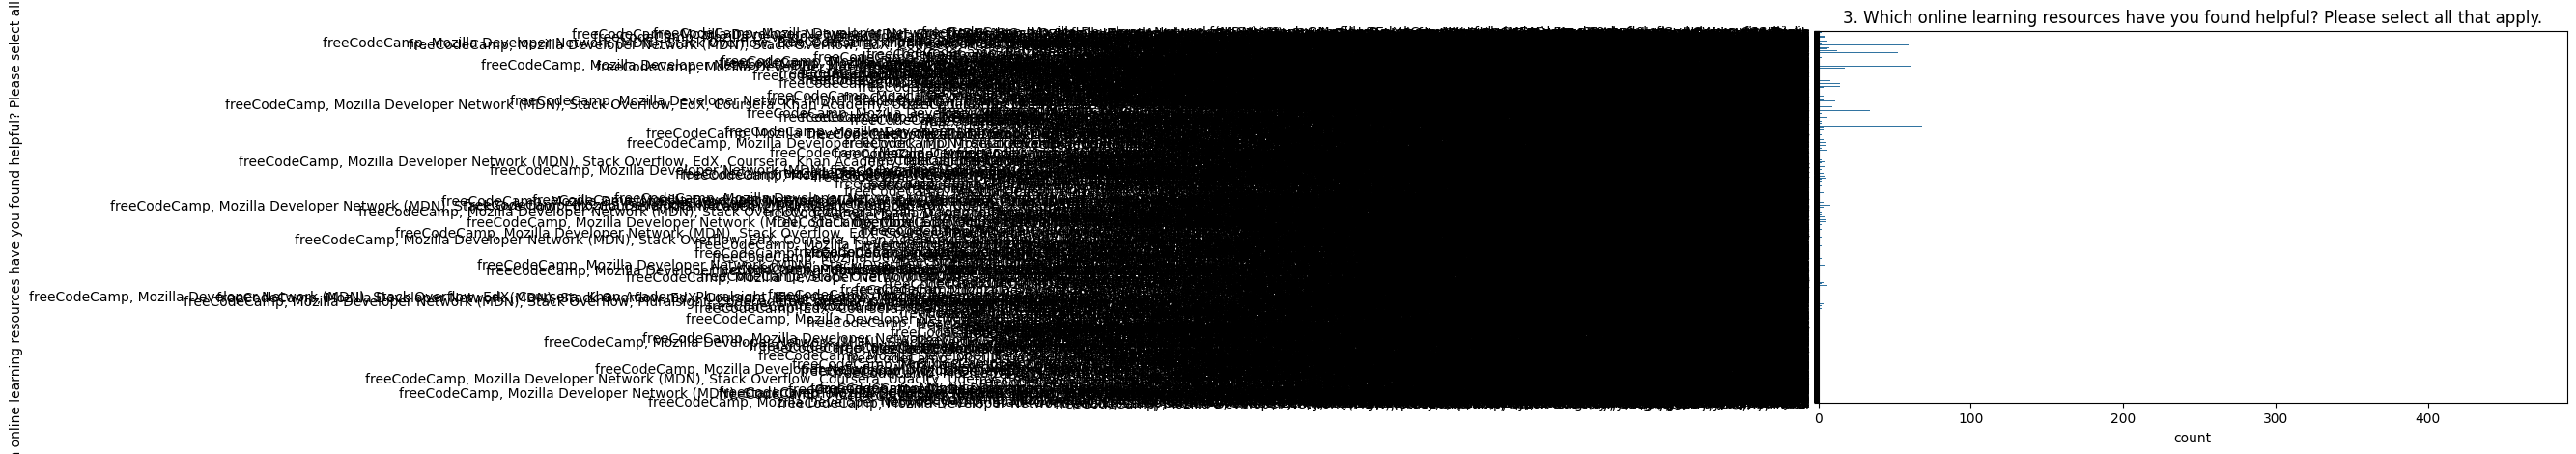

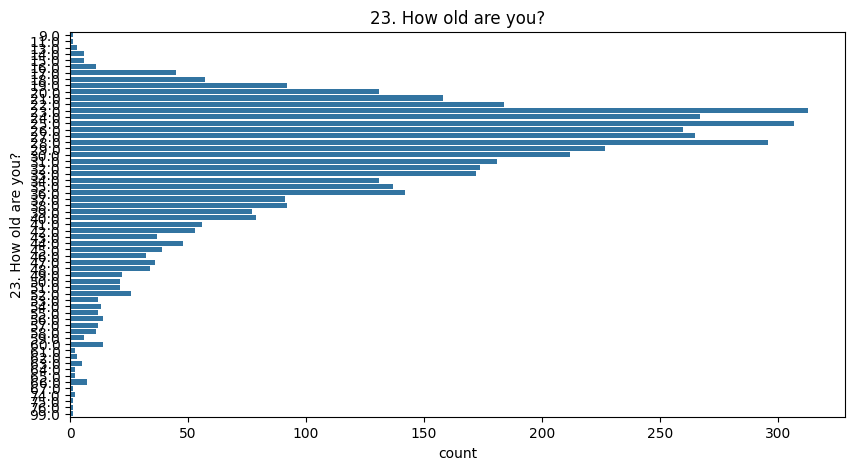

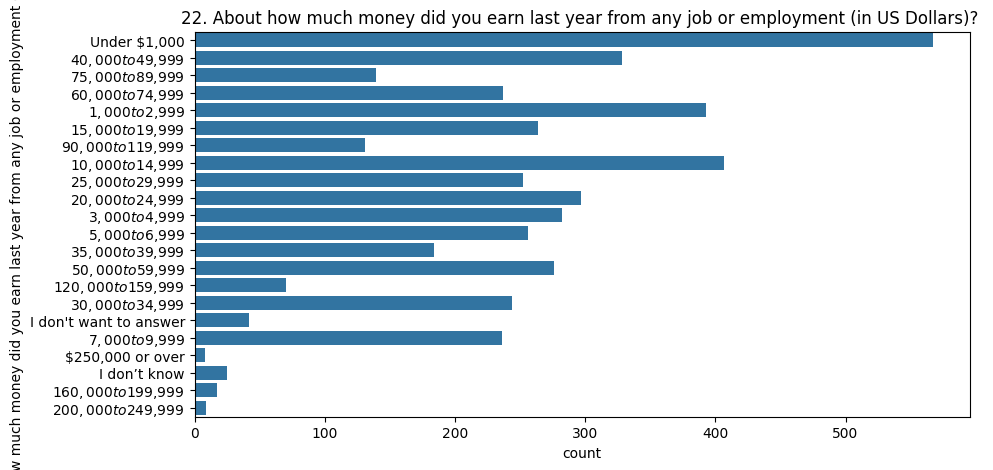

Unique income values before mapping:
['Under $1,000' '$40,000 to $49,999' '$75,000 to $89,999'
 '$60,000 to $74,999' '$1,000 to $2,999' '$15,000 to $19,999'
 '$90,000 to $119,999' '$10,000 to $14,999' '$25,000 to $29,999'
 '$20,000 to $24,999' '$3,000 to $4,999' '$5,000 to $6,999'
 '$35,000 to $39,999' '$50,000 to $59,999' '$120,000 to $159,999'
 '$30,000 to $34,999' "I don't want to answer" '$7,000 to $9,999'
 '$250,000 or over' 'I don’t know' '$160,000 to $199,999'
 '$200,000 to $249,999']


<ipython-input-1-2f02f6ad38f3>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '] = data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].astype(float)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


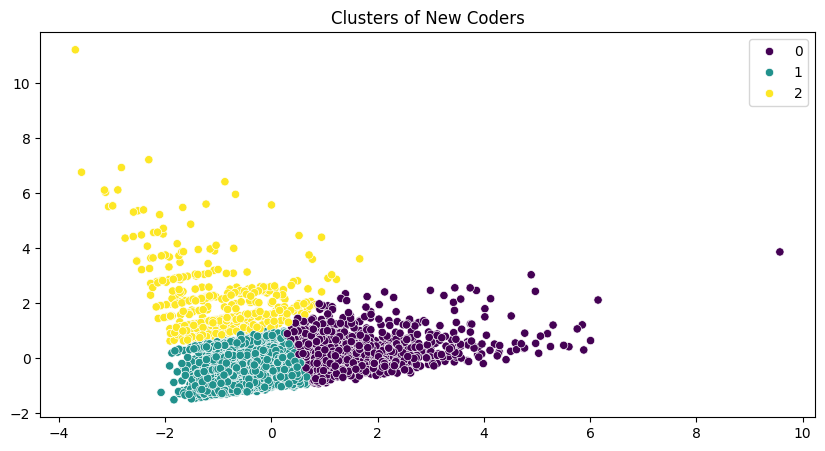

Logistic Regression Accuracy: 0.6681159420289855
              precision    recall  f1-score   support

        high       0.56      0.37      0.45       498
         low       0.70      0.84      0.76       882

    accuracy                           0.67      1380
   macro avg       0.63      0.60      0.60      1380
weighted avg       0.65      0.67      0.65      1380

[[184 314]
 [144 738]]
Decision Tree Accuracy: 0.631159420289855
              precision    recall  f1-score   support

        high       0.49      0.44      0.46       498
         low       0.70      0.74      0.72       882

    accuracy                           0.63      1380
   macro avg       0.59      0.59      0.59      1380
weighted avg       0.62      0.63      0.63      1380

[[221 277]
 [232 650]]
Random Forest Accuracy: 0.6391304347826087
              precision    recall  f1-score   support

        high       0.50      0.36      0.42       498
         low       0.69      0.79      0.74       882

  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('2021 New Coder Survey.csv')


print(data.columns)


missing_values = data.isnull().sum()
columns_to_drop = missing_values[missing_values > 0.5 * len(data)].index
data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned = data_cleaned.dropna()

print(data_cleaned.shape)


print(data_cleaned.describe())


print(data_cleaned.isnull().sum())


categorical_columns = [
    '1. What is your biggest reason for learning to code?',
    '2. What methods have you used to learn about coding? Please select all that apply.',
    '3. Which online learning resources have you found helpful? Please select all that apply.',
    '23. How old are you?',
    '22. About how much money did you earn last year from any job or employment (in US Dollars)? '
]

for col in categorical_columns:
    if col in data_cleaned.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=data_cleaned[col])
        plt.title(col)
        plt.show()


unique_income_values = data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].unique()
print("Unique income values before mapping:")
print(unique_income_values)


income_mapping = {
    'Under $1,000': 500,
    '$1,000 to $2,999': 2000,
    '$3,000 to $4,999': 4000,
    '$5,000 to $6,999': 6000,
    '$7,000 to $9,999': 8000,
    '$10,000 to $14,999': 12500,
    '$15,000 to $19,999': 17500,
    '$20,000 to $24,999': 22500,
    '$25,000 to $29,999': 27500,
    '$30,000 to $34,999': 32500,
    '$35,000 to $39,999': 37500,
    '$40,000 to $49,999': 45000,
    '$50,000 to $59,999': 55000,
    '$60,000 to $74,999': 67500,
    '$75,000 to $89,999': 82500,
    '$90,000 to $119,999': 105000,
    '$120,000 to $159,999': 140000,
    '$160,000 to $199,999': 180000,
    '$200,000 to $249,999': 225000,
    '$250,000 or over': 250000
}


data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '] = data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].replace(income_mapping)

data_cleaned = data_cleaned[data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].apply(lambda x: isinstance(x, (int, float)))]


data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '] = data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].astype(float)


features = data_cleaned[['23. How old are you?',
                         '7. About how many hours do you spend learning each week?',
                         '22. About how much money did you earn last year from any job or employment (in US Dollars)? ']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

data_cleaned['Cluster'] = clusters


pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of New Coders')
plt.show()

data_cleaned['Income'] = data_cleaned['22. About how much money did you earn last year from any job or employment (in US Dollars)? '].apply(
    lambda x: 'high' if x >= 30000 else 'low')


features = data_cleaned[['23. How old are you?',
                         '7. About how many hours do you spend learning each week?']]
target = data_cleaned['Income']


encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))



Proceeding with Cluster Analysis and Classification...


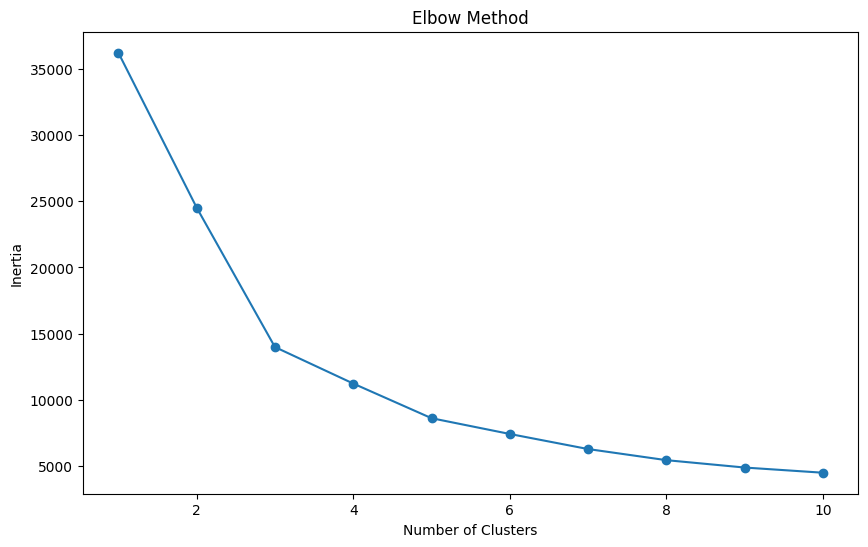

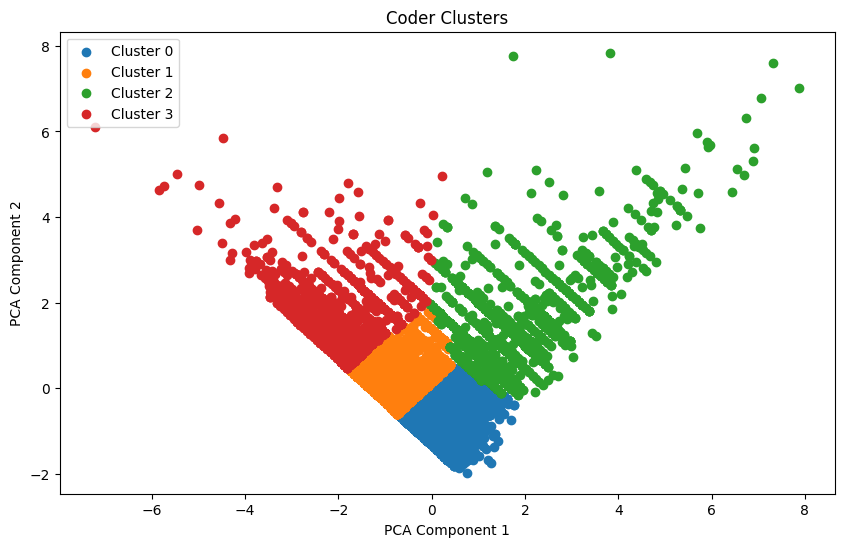

Cluster 0:
               Age  Income  LearningHours
count  9037.000000     0.0    8819.000000
mean     20.905356     NaN       8.156475
std       3.703299     NaN       6.206882
min       6.000000     NaN       0.000000
25%      18.000000     NaN       3.000000
50%      21.000000     NaN       7.000000
75%      24.000000     NaN      12.000000
max      27.000000     NaN      25.000000
---
Cluster 1:
               Age  Income  LearningHours
count  4459.000000     0.0    4193.000000
mean     33.297152     NaN       8.419118
std       4.072010     NaN       6.410660
min      28.000000     NaN       0.000000
25%      30.000000     NaN       4.000000
50%      33.000000     NaN       7.000000
75%      36.000000     NaN      12.000000
max      42.000000     NaN      28.000000
---
Cluster 2:
               Age  Income  LearningHours
count  2210.000000     0.0    2283.000000
mean     24.521493     NaN      39.138414
std       6.600795     NaN      15.920772
min      10.000000     NaN      24.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

if all([col in df.columns for col in ['Age', 'Income', 'LearningHours', 'HighIncome']]):

    print("\nProceeding with Cluster Analysis and Classification...")


    features = ['Age', 'Income', 'LearningHours']
    X = df[features].copy()


    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)


    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertias, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()


    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    df['Cluster'] = kmeans.fit_predict(X_scaled)


    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 6))
    for i in range(4):
        mask = df['Cluster'] == i
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {i}')
    plt.title('Coder Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()


    for i in range(4):
        cluster_data = df[df['Cluster'] == i]
        print(f"Cluster {i}:")
        print(cluster_data[features].describe())
        print("---")


    X = df[['Age', 'LearningHours']].copy()


    X.fillna(X.median(), inplace=True)


    y = df['HighIncome'].fillna(0)


    if y.nunique() < 2:
        print("Not enough classes in the target variable for training.")
    else:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)


        models = [
            ('Logistic Regression', LogisticRegression(max_iter=1000, class_weight='balanced')),
            ('Decision Tree', DecisionTreeClassifier(random_state=42, class_weight='balanced')),
            ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')),
            ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
            ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
        ]


        results = []
        for name, model in models:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)

            print(f"{name}:")
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}\n")

            results.append((name, accuracy, precision, recall, f1))


        models, accuracies, precisions, recalls, f1s = zip(*results)
        x = np.arange(len(models))
        width = 0.2

        plt.figure(figsize=(12, 6))
        plt.bar(x - width * 1.5, accuracies, width, label='Accuracy', alpha=0.8)
        plt.bar(x - width * 0.5, precisions, width, label='Precision', alpha=0.8)
        plt.bar(x + width * 0.5, recalls, width, label='Recall', alpha=0.8)
        plt.bar(x + width * 1.5, f1s, width, label='F1-Score', alpha=0.8)
        plt.xlabel('Models')
        plt.ylabel('Scores')
        plt.title('Model Performance Comparison')
        plt.xticks(x, [m[:10] for m in models], rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()


        best_model = max(results, key=lambda x: x[4])[0]
        if 'Random Forest' in best_model or 'Gradient Boosting' in best_model or 'XGBoost' in best_model:
            model = next(m for n, m in models if n == best_model)
            importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
            plt.figure(figsize=(10, 6))
            importances.head(15).plot(kind='bar')
            plt.title(f'Top 15 Features - {best_model}')
            plt.tight_layout()
            plt.show()

else:
    print("Missing essential columns for Cluster Analysis and Classification.")
